In [800]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
from random import seed
from random import random
import math
from scipy.special import gamma, factorial

In [801]:
def monte_carlo_integration(d,N,n):
    H = 2**d
    V = [0 for x in range(0,n)]
    for k in range(0, n):
        i = 0
        j = 0
        X = [[0 for x in range(0,d)] for y in range(0,N)] 
        for i in range(0,N):
            for j in range(0,d):
                X[i][j] = 2*random()-1      # generates random nums in range -1,1  
        S = is_inside_cube(X,N,d) # returns count of points inside
        Vol = H*(S/N)
        V[k] = Vol
    mean = round(np.mean(V),4)
    std = round(np.std(V)/np.sqrt(n),4) 
    precision = round((4*std)/mean,4)
    return (precision, mean, std)

In [802]:
def find_analytical_volume(d):
    return round(((math.pi)**(d/2))/gamma((d/2)+1),4)

In [803]:
def find_one_accuracy(d,determined_vol):
    actual_vol = find_analytical_volume(d)
    accuracy = 100 - (100*(np.abs(determined_vol-actual_vol)/actual_vol))
    return accuracy

In [804]:
def find_accuracy(d):
    list = []
    determined_vol = [2.0,3.1416,4.1888,4.9347,5.2635,5.1673,4.7246,4.0587,3.2975,2.5510] # uncommented for monto carlo
   # determined_vol = [1.9998,3.1413,4.1889] # uncomment for cube based
    for i in range(1,d+1):
        actual_vol = find_analytical_volume(i)
        accuracy = 100 - (100*(np.abs(determined_vol[i-1]-actual_vol)/actual_vol))
        list.append(accuracy)
    return list

In [805]:
def is_inside_cube(X,N,d): # Rejection algorithm, finds count of points inside
    i=0
    j=0
    count=0
    for i in range(0,N):
        ssq = 0 # sum of squares
        for j in range(0,d):
            ssq += X[i][j]**2
        if(np.sqrt(ssq)<=1):
            count+=1;
    return count

In [806]:
def cube_based_integration(k,d):
    grid_side = 2/k
    inside_count = 0
    outside_count = 0
    intersect_count = 0
    grid_coordinates = np.linspace(-1,1,k+1) # creates array of coordinate points for square grids in range -1,-1 with side_len = 2/k
    # center of hypersphere is assumed to be 0,0
    corner_coodinates = [0 for x in range(0,d)] # stores grid's corner coordinates 
    grid_vol = grid_side**d
    flag = 1
    while(flag==1):
        if(np.sum(corner_coodinates) == (k-1)*d): # boundary condition, limit for loop
            flag = 0
        sum=0
        ssq=0
        center_coodinates = [0 for x in range(0,d)] # stores grid's center coordinates 
        for i in range (0,d): # computes the center of grid & distance from hypersphere center
            center_coodinates[i] = grid_coordinates[corner_coodinates[i]]
            center_coodinates[i] = center_coodinates[i] + (grid_side/2)
            ssq+=center_coodinates[i]**2 # sum of squares
        centers_distance = np.sqrt(ssq) # Distance=square root[(𝑥2−𝑥1)^2+(𝑦2−𝑦1)^2]; (x1,y1) = (0,0) here
        half_diagonal_distance = (np.sqrt(2)*grid_side)/2 # diagonal len of grid = square root[2]*grid_side, we divide this by 2
        radius = 1 # hypersphere's radius 
        if(centers_distance <= (radius-half_diagonal_distance)): # grid is fully inside
            inside_count+=1;
        elif (centers_distance >= (radius+half_diagonal_distance)): # grid is fully outside
            outside_count+=1;
        else: # grid is intersecting
            intersect_count+=1; 
        flag1 = 1
        dimension = d-1
        while(flag1==1 and dimension>=0):
            corner_coodinates[dimension]+=1
            if(corner_coodinates[dimension] > k-1): # boundary check, as I will be incrementing k times from last coordinate d
                corner_coodinates[dimension]=0 # re-initialize to continue changing other index
                flag1=1
            else:
                flag1=0
            dimension = dimension - 1   
    lower_bound = round(inside_count*grid_vol,4)
    upper_bound = round((inside_count+(intersect_count/2))*grid_vol,4)
    precision = round(np.abs(upper_bound-lower_bound)/np.average([upper_bound,lower_bound]),4)
    return (precision, lower_bound, upper_bound)

In [807]:
#part 1 for n=100

def run_monte_carlo(d):
    myList = [100000,4000000,8000000,12100000,13000000,15000000,16300000,18000000,20600000,23000000,25000000,27000000,29500000,34100000,38800000,40000000]
    for N in myList: 
        start_time = time.time()
        (precision, determined_volume, std) = monte_carlo_integration(d,N,100); # d dimension, N points, n runs
        run_time = time.time() - start_time
        if(precision<=0.0001):
            print("N="+str(N))
            print("volume="+str(determined_volume))
            print("std="+str(std))
            print("precision="+str(precision))
            print("accuracy="+str(accuracy))
            print("run time="+str(run_time))
            break 

In [808]:
#part 1 
#upper_bound is considered as hypersphere volume
#Using linear search k is determined satisfying 4 digits precision whereas K-1 does not

def run_cube_based(d):
    k=8889  #change 8889 for d=1, 15502 for d=2, 35607 for d=3
    for i in range(1,11):
        k=k+7000
        print("for k: " + str(k))
        start_time = time.time()
        precision, lower, upper = cube_based_integration(k,d)
        run_time = time.time() - start_time
        if(precision <= 0.0001): #K satisfying 4 digits precision 
            print("precision="+str(precision))
            print("Volume="+str(upper)) # volume of the hypersphere
            print("k="+str(k))
            print("run time="+str(run_time))
            break

In [809]:
#part 2
#run Monto Carlo and Cube Based for N=10^6
#For Cube Based - vol is average of lower and upper bound determined

def run_MC_Cube():
    N = 1000000
    for dim in range (1,11):
        print("dimension="+str(dim))
        k = round(N**(1/dim))
        start_time = time.time()
        (precision, mean, std) = monte_carlo_integration(dim, N, 100) # run MC
        print("MC run="+str(time.time() - start_time))
        print(mean)
        print(find_one_accuracy(dim,mean))
        start_time = time.time()
        precision, lower, upper = cube_based_integration(k,dim) # run cube based
        print("Cube run="+str(time.time() - start_time))
        volume = round(np.average([lower,upper]),4) # vol is avg of lower and upper bound determined
        print(volume)
        print(find_one_accuracy(dim,volume))

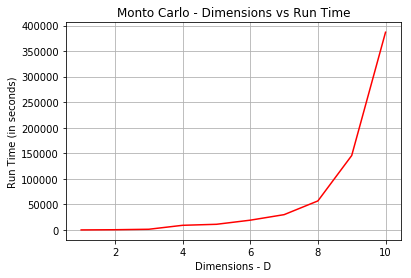

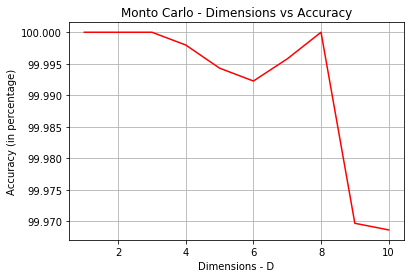

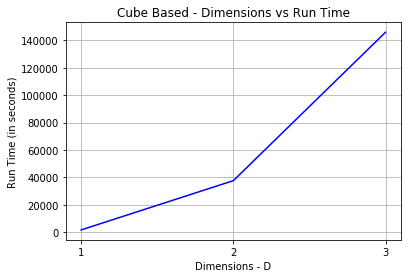

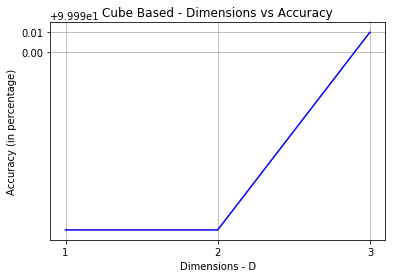

In [810]:
# Graphs

# part 1 - Monto Carlo - Dimensions(X-axis) vs Run Time(y-axis)
y = [260.25, 627.36, 1540.7538, 9274.92, 11254.22, 19303.99992, 30104.63, 56961.244, 145769.788, 386838.787] 
x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x, y,'r')
plt.xlabel('Dimensions - D')
plt.ylabel('Run Time (in seconds)') 
plt.title('Monto Carlo - Dimensions vs Run Time') 
plt.grid(True)
plt.show()

# part 1 - Monto Carlo - Dimensions(X-axis) vs Accuracy(y-axis)
y = find_accuracy(10)
x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x, y,'r')
plt.xlabel('Dimensions - D')
plt.ylabel('Accuracy (in percentage)') 
plt.title('Monto Carlo - Dimensions vs Accuracy') 
plt.grid(True)
plt.show()

# part 1 - Cube Based - Dimensions(X-axis) vs Run Time(y-axis)
y = [1540.7538, 37548.82, 146033.028] 
x = [1,2,3]
plt.plot(x, y,'b')
plt.xticks(np.arange(1, 4, 1.0))
plt.xlabel('Dimensions - D')
plt.ylabel('Run Time (in seconds)') 
plt.title('Cube Based - Dimensions vs Run Time') 
plt.grid(True)
plt.show()

# part 1 - Cube Based - Dimensions(X-axis) vs Accuracy(y-axis)
y = [99.9,99.9,100]
plt.plot(x, y,'b')
plt.xticks(np.arange(1, 4, 1.0))
plt.yticks(np.arange(99.99, 100.0, 0.01))
plt.xlabel('Dimensions - D')
plt.ylabel('Accuracy (in percentage)') 
plt.title('Cube Based - Dimensions vs Accuracy') 
plt.grid(True)
plt.show()

In [811]:
#part 3 
#finding pi for constant unknown N, d=2 and n=100

def find_pi():
    mylist = [100,1000,10000,100000,1000000]
    for N in mylist:
        k = round(N**(1/2))
        print("N="+str(N))
        print("k="+str(k))
        start_time = time.time()
        (precision, mean, std) = monte_carlo_integration(2, N, 100) # run MC
        print("MC run="+str(time.time() - start_time))
        print(mean)
        print(find_one_accuracy(2,mean))
        start_time = time.time()
        precision, lower, upper = cube_based_integration(k,2) # run cube based
        print("Cube run="+str(time.time() - start_time))
        volume = round(np.average([lower,upper]),4) # vol is avg of lower and upper bound determined
        print(volume)
        print(find_one_accuracy(2,volume))

In [813]:
if __name__ == '__main__':
    run_cube_based(1)      # run for part 1 cube_based precision, change d input till 3 
    #run_MC_Cube()          # run for part 2 uncomment
    find_pi()               # run for part 3 uncommented
    #start_time = time.time()
    #print(monte_carlo_integration(3,8000000,100))       # run for part 1 monte_carlo precision 
    #print(cube_based_integration(8889,1))              # run for part 2 cube_based precision, 8889 for d=1, 15502 for d=2, 35607 for d=3
    #print("--- %s seconds ---" % (time.time() - start_time))
    #run_monte_carlo(2)   # run for part 1 monte_carlo precision, change d input till 10

KeyboardInterrupt: 